In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import display, Markdown
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv('mcdonalds_menu_nutrition.csv')

In [10]:
data.shape

(260, 24)

In [12]:
# Display the first few rows of the dataset
display(Markdown("**First few rows of the dataset:**"))
data.head()

**First few rows of the dataset:**

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [9]:
# Check data types 
display(Markdown("**Data types**"))
data.info()

**Data types**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [16]:
# Summary statistics
display(Markdown("**Summary statistics:**"))
data.describe()

**Summary statistics:**

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,20.676923,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,24.034954,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,4.750000,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,8.000000,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,36.250000,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,150.000000,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [18]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [20]:
# Checking for the NULL value
display(Markdown("**Evaluating NULL Values:**"))
null_summary = data.isna().sum()
print(null_summary)

**Evaluating NULL Values:**

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


<Axes: xlabel='Category'>

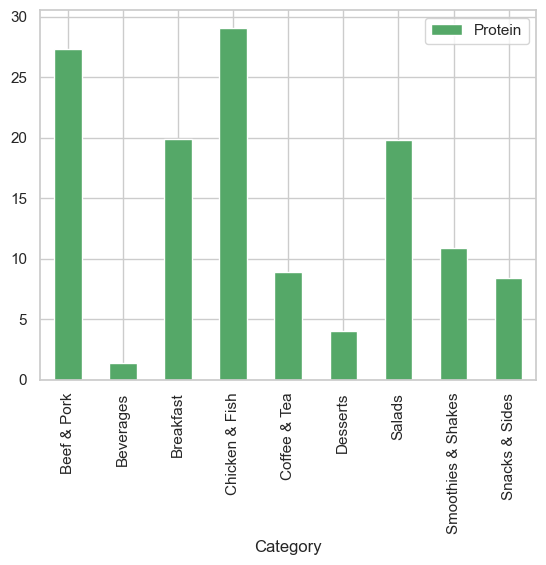

In [26]:
data.pivot_table('Protein','Category').plot(kind='bar',stacked=True,color='g')

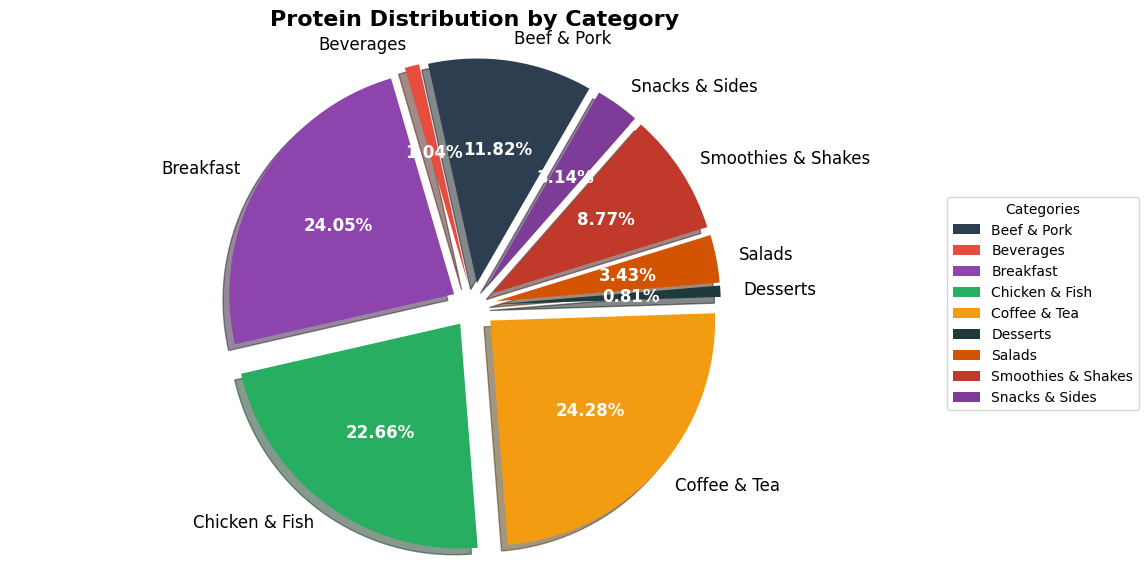

In [13]:
# Group by 'Category' and sum the 'Protein' values
protein_by_category = data.groupby('Category')['Protein'].sum()

# Define colors for the pie chart
colors = ['#2C3E50', '#E74C3C', '#8E44AD', '#27AE60', '#F39C12','#1F3A3D',
          '#D35400', '#C0392B', '#7D3C98','#16A085']

# Plotting the pie chart
plt.figure(figsize=(12, 7))
wedges, texts, autotexts = plt.pie(
    protein_by_category,
    labels=protein_by_category.index,
    autopct='%0.2f%%',
    startangle=60,
    colors=colors,
    shadow=True,
    explode=[0.1] * len(protein_by_category)  
)

# Beautify the pie chart
plt.setp(autotexts, size=12, weight="bold", color="white")  
plt.setp(texts, size=12) 

plt.title('Protein Distribution by Category', fontsize=16, fontweight='bold')  # Title style
plt.axis('equal')  

# Add a legend
plt.legend(wedges, protein_by_category.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()

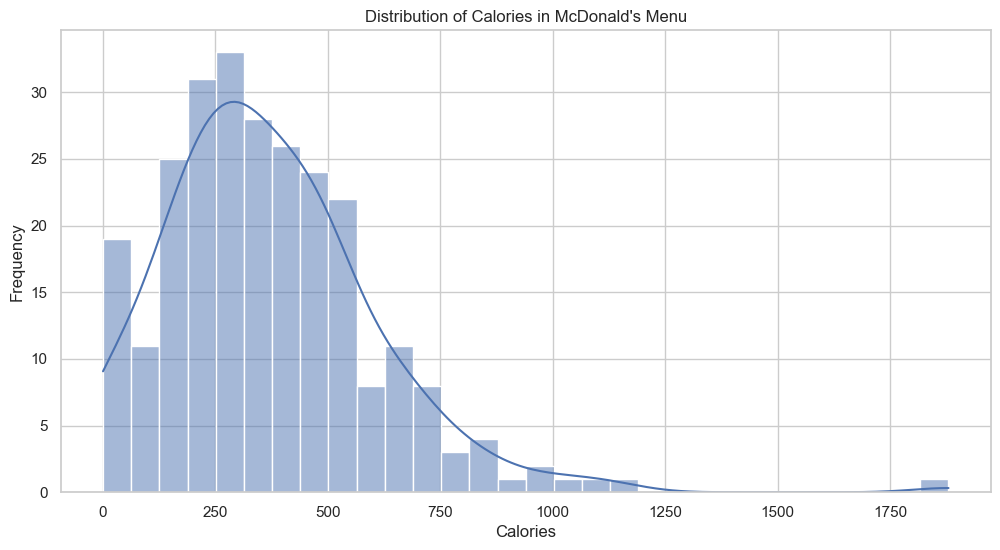

In [38]:
# Distribution of Calories
plt.figure(figsize=(12, 6))
sns.histplot(data['Calories'], bins=30, kde=True)
plt.title('Distribution of Calories in McDonald\'s Menu')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

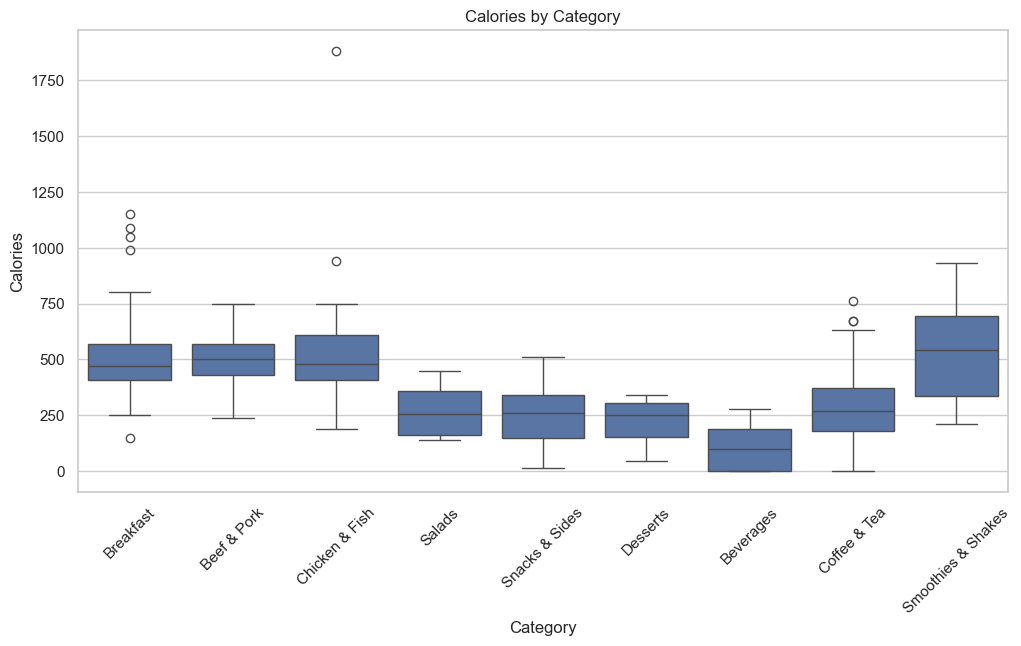

In [40]:
# Boxplot of Calories by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Category', y='Calories')
plt.title('Calories by Category')
plt.xticks(rotation=45)
plt.ylabel('Calories')
plt.show()

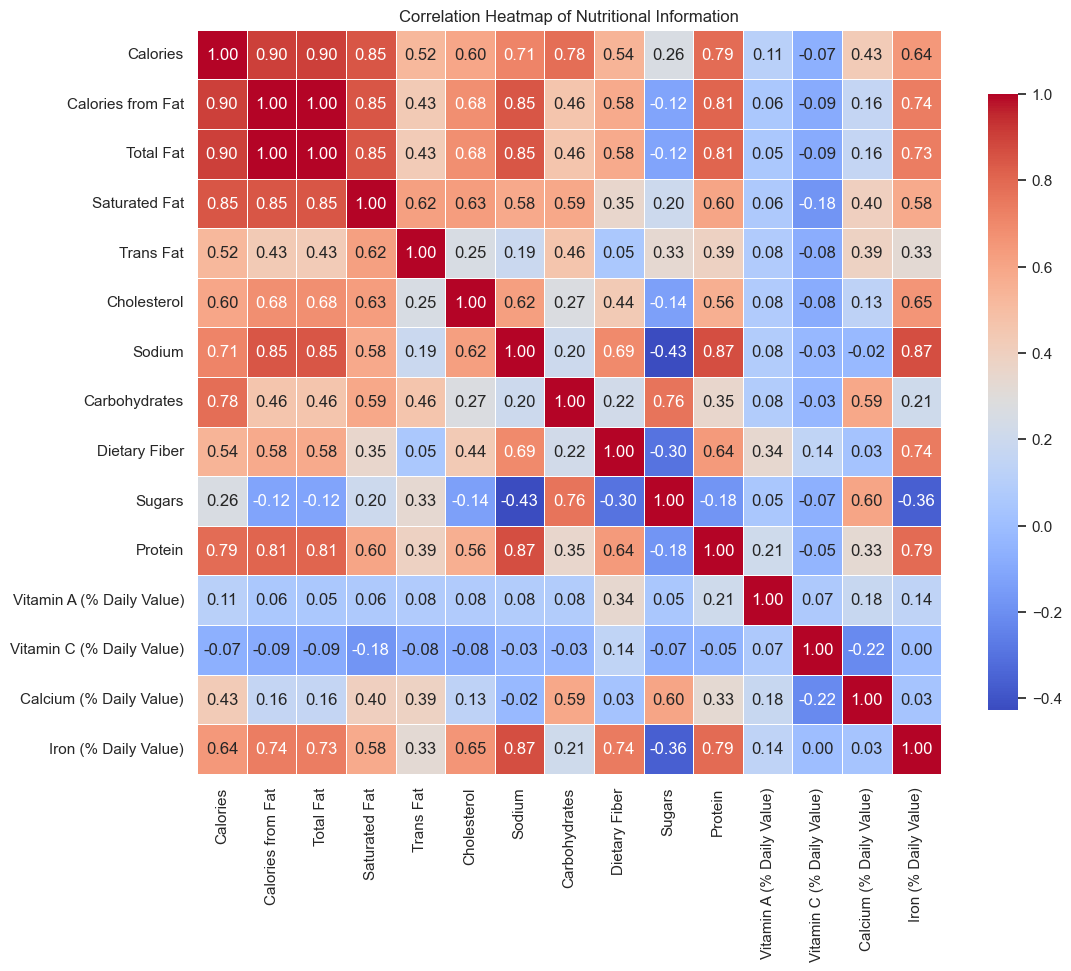

In [42]:
# Heatmap of Nutritional Information
nutrition_features = [
    'Calories', 'Calories from Fat', 'Total Fat', 'Saturated Fat', 
    'Trans Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 
    'Dietary Fiber', 'Sugars', 'Protein', 
    'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 
    'Calcium (% Daily Value)', 'Iron (% Daily Value)'
]
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Compute the correlation matrix
correlation_matrix = data[nutrition_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Nutritional Information')
plt.show()

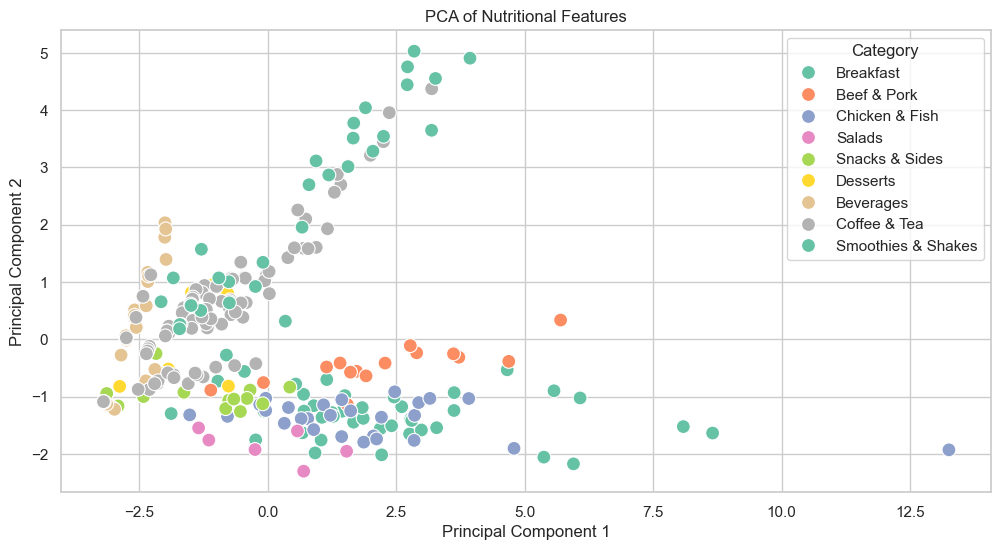

In [52]:
# Specify nutritional features for PCA
nutrition_features = [
    'Calories', 
    'Total Fat', 
    'Saturated Fat', 
    'Trans Fat', 
    'Cholesterol', 
    'Sodium', 
    'Carbohydrates', 
    'Dietary Fiber', 
    'Sugars', 
    'Protein'
]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[nutrition_features])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Category'] = data['Category']

# Scatter plot of PCA results
plt.figure(figsize=(12, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Category', palette='Set2', s=100)
plt.title('PCA of Nutritional Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Category')
plt.show()

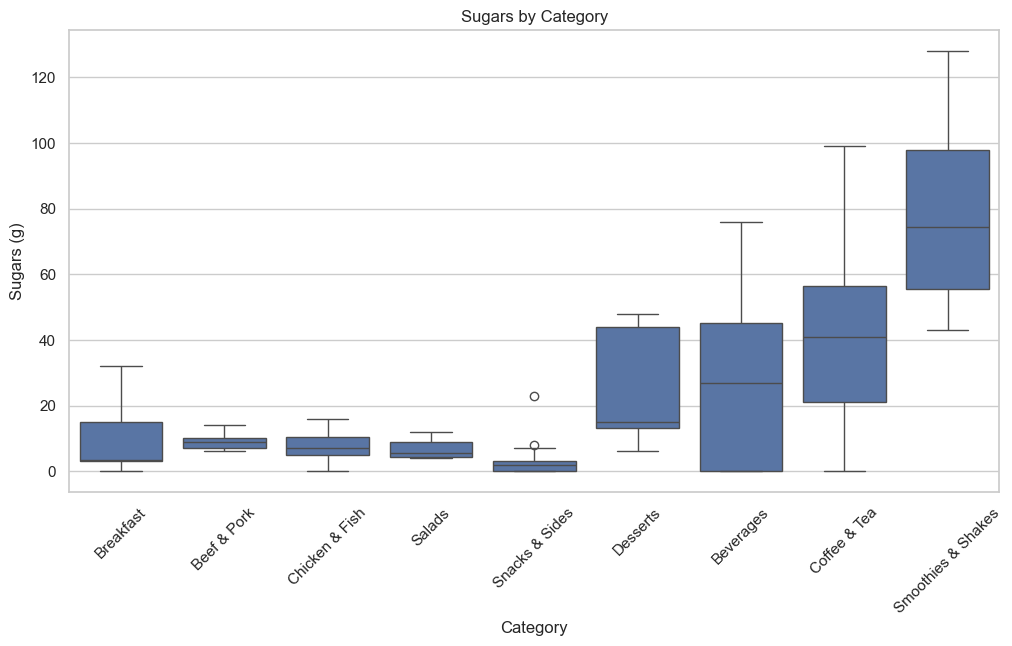

In [48]:
# Boxplot of Sugars by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Category', y='Sugars')
plt.title('Sugars by Category')
plt.xticks(rotation=45)
plt.ylabel('Sugars (g)')
plt.show()

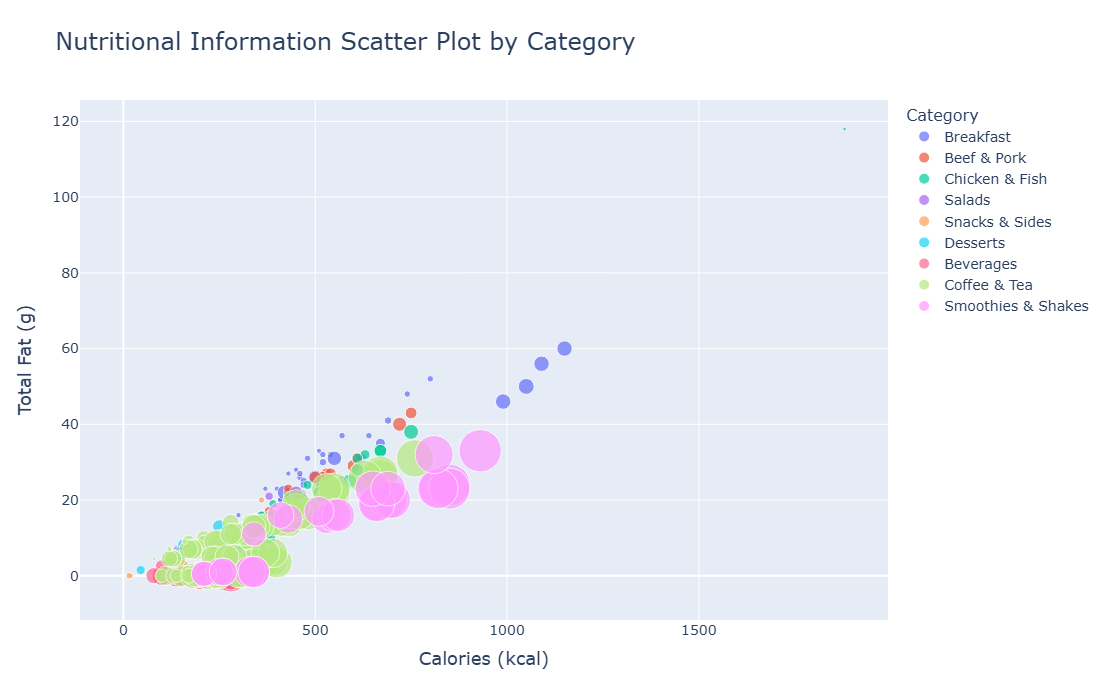

In [31]:
# scatter plot
fig = px.scatter(data, 
                  x="Calories", 
                 y="Total Fat", 
                 size="Sugars", 
                 color="Category",  # Use Category for color coding
                 hover_name="Item",
                 title="Nutritional Information Scatter Plot by Category",
                 labels={"Calories": "Calories (kcal)", "Total Fat": "Total Fat (g)"},
                 size_max=30)
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=700,  # Set the height of the plot
    title_font=dict(size=24),
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    legend_title_font=dict(size=16),
    font=dict(size=14)  # General font size
)

# Show the plot
fig.show()

# finish